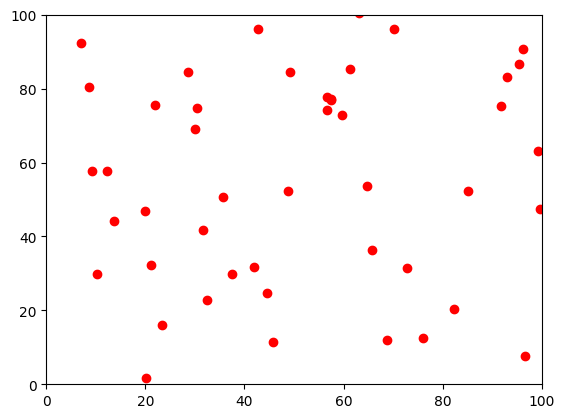

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
num_particles = 200
time_steps = 100
dt = 0.1  # Time step size
xlim = (0, 100)
ylim = (0, 100)

# Initialize particles
# Each particle is represented by its position (x, y) and velocity (vx, vy)
particles = np.zeros((num_particles, 4))  # Columns are x, y, vx, vy
particles[:, :2] = np.random.rand(num_particles, 2) * np.array([xlim[1], ylim[1]])  # Random initial positions
particles[:, 2:] = (np.random.rand(num_particles, 2) - 0.5) * 20  # Random initial velocities

# Update function to move particles
def update_positions(particles, dt):
    particles[:, :2] += particles[:, 2:] * dt


fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ln,

def update(frame):
    update_positions(particles, dt)
    ln.set_data(particles[:, 0], particles[:, 1])
    return ln,

ani = FuncAnimation(fig, update, frames=range(time_steps),
                    init_func=init, blit=True)

ani.save('test.mp4', writer='ffmpeg', fps=10)
